In [54]:
from PIL import Image, ImageEnhance, ImageFilter
from matplotlib.pyplot import imshow, imsave
import numpy as np
from skimage.transform import resize
from skimage.io import imread
from skimage.filters.rank import mean
import cv2
%matplotlib inline

In [55]:
def contrast(img, factor):
    im = img.copy()
    contraster = ImageEnhance.Contrast(im)
    im = contraster.enhance(factor)
    return im

In [56]:
def brightness(img, factor):
    im = image.copy()
    enhancer = ImageEnhance.Brightness(im)
    im = enhancer.enhance(factor)
    return im

In [57]:
def sharpen(img, factor):
    im = img.copy()
    im.filter(ImageFilter.SHARPEN)
    return im

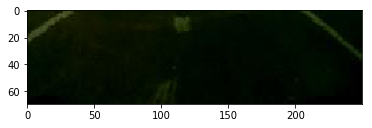

In [58]:
image = Image.open('test1.jpg', 'r')
res = brightness(image, 8)
imshow(np.asarray(image))

In [169]:
HEIGHT, WIDTH = 66, 200

image = imread('res.jpg')
image = resize(image, (HEIGHT, WIDTH))

mean = image.mean()
print('mean: {1}'.format(i, mean))

for i in range(3):
    mean = image[:, :, i].mean()
    print('mean {0}: {1}'.format(i, mean))

mean: 0.3865433749257278
mean 0: 0.37933957219251335
mean 1: 0.41039601901366607
mean 2: 0.36989453357100405


/home/hippolyte/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/hippolyte/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


mean 0: 0.7604765300059416
mean 1: 0.8177147950089125
mean 2: 0.7426185383244205
after: 0.5386038993700573, 0.5548641804115134, 0.5336756971692148


/home/hippolyte/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/hippolyte/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


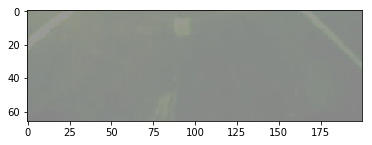

In [239]:
HEIGHT, WIDTH = 66, 200

image = imread('bright.jpg')
image = resize(image, (HEIGHT, WIDTH))

# compute mean for all channels to determine if the image
# is bright or dark

mean = image.mean()

# the value is arbitrary
bright = mean > 0.4
ideals = [0.035, 0.11, 0.011]

# compute mean for each channel
for i, ideal in enumerate(ideals):
    if bright:
        ideal = np.exp(ideal - 1)
    mean = image[:, :, i].mean()
    image[:, :, i] = image[:, :, i] * (ideal / mean)
    print('mean {0}: {1}'.format(i, mean))


# normalization of the image
image[image > 1] = 1
image = np.exp(image - 1)
print('after: {0}, {1}, {2}'.format(image[:, :, 0].mean(),
                                    image[:, :, 1].mean(),
                                    image[:, :, 2].mean()))


imshow(image)
imsave('res.jpg', image)

print(image.shape)

In [215]:
image = imread('bright.jpg')
image = image * 2
image[image > 1] = 1
imsave('bright2.jpg', image)